# Notebook 기본 세팅

In [1]:
# Constant 선언

# 프로젝트 루트 디렉토리를 식별하기 위한 마커 파일 이름
ROOT_MARKER = "pyproject.toml"

# 한글 표시를 위한 나눔바른고딕 폰트 파일 이름
# matplotlib 의 font_manager 에 실제 폰트 파일의 위치를 넣어주어야 한다.
KOREAN_FONT_FILE = "NanumBarunGothic.ttf"

# matplotlib 에서는 font-family 의 이름으로 font 를 설정한다.
# 그래서 font 파일 그 자체가 아니라, 그 파일의 family 이름을 적어준다.
KOREAN_FONT_FAMILY = "NanumBarunGothic"

# 참고
# Font Family 와 Font File 의 차이는,
# Font Family 는 비슷한 디자인 특성을 공유하는 글꼴 그룹을 의미한다.
#
# 예를 들어 '나눔바른고딕' 폰트 패밀리는 일반(Regular), 굵게(Bold), 기울임(Italic) 등 여러 스타일을 포함할 수 있다.
# 반면, 폰트 파일(.ttf, .otf 등)은 이러한 폰트의 하나의 스타일이 저장된 실제 파일이다.
#
# 이 프로젝트에서는 폰트 용량을 줄이기 위해 일반(Regular) 인 NanumBarunGothic.ttf 만 사용한다.

In [2]:
# 프로젝트 root 를 sys.path 에 추가해서 import 구문을 사용하기 쉽게
from pathlib import Path


def find_project_root() -> Path:
    """
    pyproject.toml 파일을 기준으로 루트 디렉토리를 찾는다.
    :return: Path: 프로젝트 루트 디렉토리 경로
    """

    current_path = Path().resolve()

    while current_path != current_path.parent:
        if (current_path / ROOT_MARKER).exists():
            return current_path

        current_path = current_path.parent

    raise FileNotFoundError("프로젝트 루트 디렉토리를 찾을 수 없습니다.")


ROOT_DIR = find_project_root()

In [3]:
# matplotlib 의 한글 font 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


FONTS_DATA_DIR = ROOT_DIR / "notebooks" / "fonts"


def setup_korean_font():
    font_path = FONTS_DATA_DIR / KOREAN_FONT_FILE
    fm.fontManager.addfont(font_path)

    # 폰트 설정
    plt.rcParams["font.family"] = KOREAN_FONT_FAMILY
    plt.rcParams["axes.unicode_minus"] = False


setup_korean_font()

# 기상 데이터 EDA

## 기상 데이터 컬럼 설명

## 기본 관측 정보
- stn_id: 종관기상관측 지점 번호
- stn_nm: 종관기상관측 지점명
- tm: 시간(일시)

## 기온 관련 데이터
- avg_ta: 평균 기온(°C)
- min_ta: 최저 기온(°C)
- min_ta_hrmt: 최저 기온 시각(hhmi)
- max_ta: 최고 기온(°C)
- max_ta_hrmt: 최고 기온 시각(hhmi)
- avg_ts: 평균 지면온도(°C)
- min_tg: 최저 초상온도(°C)

## 지중온도 데이터
- avg_cm5_te: 평균 5cm 지중온도(°C)
- avg_cm10_te: 평균 10cm 지중온도(°C)
- avg_cm20_te: 평균 20cm 지중온도(°C)
- avg_cm30_te: 평균 30cm 지중온도(°C)
- avg_m05_te: 0.5m 지중온도(°C)
- avg_m10_te: 1.0m 지중온도(°C)
- avg_m15_te: 1.5m 지중온도(°C)
- avg_m30_te: 3.0m 지중온도(°C)
- avg_m50_te: 5.0m 지중온도(°C)

## 강수 관련 데이터
- sum_rn_dur: 강수 계속시간(hr)
- mi10_max_rn: 10분 최다강수량(mm)
- mi10_max_rn_hrmt: 10분 최다강수량 시각(hhmi)
- hr1_max_rn: 1시간 최다강수량(mm)
- hr1_max_rn_hrmt: 1시간 최다 강수량 시각(hhmi)
- sum_rn: 일강수량(mm)
- n99_rn: 9-9강수(mm)

## 적설 관련 데이터
- dd_mefs: 일 최심신적설(cm)
- dd_mefs_hrmt: 일 최심신적설 시각(hhmi)
- dd_mes: 일 최심적설(cm)
- dd_mes_hrmt: 일 최심적설 시각(hhmi)
- sum_dpth_fhsc: 합계 3시간 신적설(cm)

## 바람 관련 데이터
- max_ins_ws: 최대 순간풍속(m/s)
- max_ins_ws_wd: 최대 순간 풍속 풍향(16방위)
- max_ins_ws_hrmt: 최대 순간풍속 시각(hhmi)
- max_ws: 최대 풍속(m/s)
- max_ws_wd: 최대 풍속 풍향(16방위)
- max_ws_hrmt: 최대 풍속 시각(hhmi)
- avg_ws: 평균 풍속(m/s)
- hr24_sum_rws: 풍정합(100m)
- max_wd: 최다 풍향(16방위)

## 습도 및 기압 관련 데이터
- avg_td: 평균 이슬점온도(°C)
- min_rhm: 최소 상대습도(%)
- min_rhm_hrmt: 평균 상대습도 시각(hhmi)
- avg_rhm: 평균 상대습도(%)
- avg_pv: 평균 증기압(hPa)
- avg_pa: 평균 현지기압(hPa)
- max_ps: 최고 해면 기압(hPa)
- max_ps_hrmt: 최고 해면기압 시각(hhmi)
- min_ps: 최저 해면기압(hPa)
- min_ps_hrmt: 최저 해면기압 시각(hhmi)
- avg_ps: 평균 해면기압(hPa)

## 일조 및 일사 관련 데이터
- ss_dur: 가조시간(hr)
- sum_ss_hr: 합계 일조 시간(hr)
- hr1_max_icsr_hrmt: 1시간 최다 일사 시각(hhmi)
- hr1_max_icsr: 1시간 최다 일사량(MJ/m2)
- sum_gsr: 합계 일사량(MJ/m2)

## 구름 및 기타 기상 현상
- avg_tca: 평균 전운량(10분위)
- avg_lmac: 평균 중하층운량(10분위)
- iscs: 일기현상
- sum_fog_dur: 안개 계속 시간(hr)

## 증발 관련 데이터
- sum_lrg_ev: 합계 대형증발량(mm)
- sum_sml_ev: 합계 소형증발량(mm)

- 맑음, 흐림, 비, 눈 예측
- 최저 기온, 최대 기온 예측

In [4]:
from src.data.loader import AsosDataLoader
from src.libs.storage import Storage


storage = Storage.create()
loader = AsosDataLoader(storage)

In [5]:
asos_station_dfs = loader.load()
type(asos_station_dfs)

[2025-05-29 12:09:38] INFO [src.libs.storage._check_and_log_response] Success to retrieve 
[2025-05-29 12:09:38] INFO [src.libs.storage._check_and_log_response] Success to read datasets/20200527-20250527-100-daegwallyeong.csv
[2025-05-29 12:09:38] INFO [src.libs.storage._check_and_log_response] Success to read datasets/20200527-20250527-101-chuncheon.csv
[2025-05-29 12:09:38] INFO [src.libs.storage._check_and_log_response] Success to read datasets/20200527-20250527-102-baengnyeongdo.csv
[2025-05-29 12:09:38] INFO [src.libs.storage._check_and_log_response] Success to read datasets/20200527-20250527-105-gangneung.csv
[2025-05-29 12:09:38] INFO [src.libs.storage._check_and_log_response] Success to read datasets/20200527-20250527-106-donghae.csv
[2025-05-29 12:09:38] INFO [src.libs.storage._check_and_log_response] Success to read datasets/20200527-20250527-108-seoul.csv
[2025-05-29 12:09:38] INFO [src.libs.storage._check_and_log_response] Success to read datasets/20200527-20250527-112-inch

dict

In [6]:
for station, df in asos_station_dfs.items():
    print(station, df.shape)

AsosStation.DAEGWALLYEONG (1827, 62)
AsosStation.CHUNCHEON (1826, 62)
AsosStation.BAENGNYEONGDO (1827, 62)
AsosStation.GANGNEUNG (1827, 62)
AsosStation.DONGHAE (1827, 62)
AsosStation.SEOUL (1827, 62)
AsosStation.INCHEON (1827, 62)
AsosStation.WONJU (1827, 62)
AsosStation.ULLEUNGDO (1827, 62)
AsosStation.SUWON (1827, 62)
AsosStation.YEONGWOL (1827, 62)
AsosStation.CHUNGJU (1827, 62)
AsosStation.SEOSAN (1827, 62)
AsosStation.ULJIN (1827, 62)
AsosStation.CHEONGJU (1827, 62)
AsosStation.DAEJEON (1827, 62)
AsosStation.CHUPUNGNYEONG (1827, 62)
AsosStation.ANDONG (1827, 62)
AsosStation.SANGJU (1827, 62)
AsosStation.POHANG (1827, 62)
AsosStation.GUNSAN (1826, 62)
AsosStation.DAEGU (1827, 62)
AsosStation.JEONJU (1827, 62)
AsosStation.ULSAN (1827, 62)
AsosStation.CHANGWON (1827, 62)
AsosStation.GWANGJU (1827, 62)
AsosStation.BUSAN (1827, 62)
AsosStation.TONGYEONG (1825, 62)
AsosStation.MOKPO (1827, 62)
AsosStation.YEOSU (1827, 62)
AsosStation.HEUKSANDO (1827, 62)
AsosStation.WANDO (1827, 62)
Aso

In [7]:
import pandas as pd


total_asos_df = pd.concat([df for _, df in asos_station_dfs.items()])
total_asos_df.shape

(166247, 62)

- column 별 결측치 개수와 결측치 비율 계산

In [8]:
total = total_asos_df.shape[0]
na_ratio_per_cols = {}
for col in total_asos_df.columns:
    num_of_nan = total_asos_df[col].isna().sum()
    ratio_of_nan = round(num_of_nan / total * 100, 3)
    na_ratio_per_cols[col] = {
        "num_of_nan": num_of_nan,
        "ratio_of_nan": ratio_of_nan,
    }
na_ratio_df = pd.DataFrame(na_ratio_per_cols).T
na_ratio_df["num_of_nan"] = na_ratio_df["num_of_nan"].astype(int)
na_ratio_df = na_ratio_df.sort_values("ratio_of_nan", ascending=False)
na_ratio_df

,num_of_nan,ratio_of_nan
dd_mefs_hrmt,165127,99.326
sum_dpth_fhsc,165039,99.273
dd_mefs,165033,99.270
dd_mes_hrmt,164511,98.956
dd_mes,164488,98.942
...,...,...
min_ta_hrmt,105,0.063
ss_dur,34,0.020
stn_nm,0,0.000
tm,0,0.000


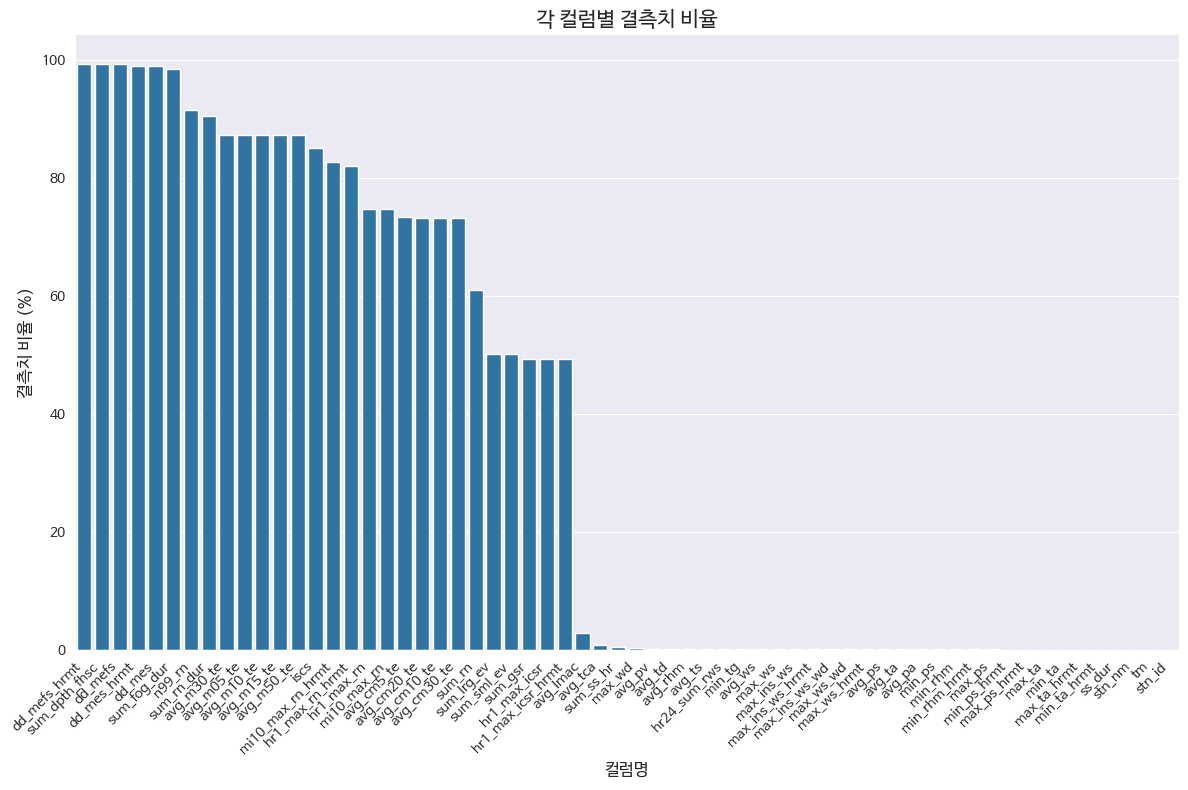

In [16]:
import seaborn as sns


plt.figure(figsize=(12, 8))

# 결측치 비율에 대한 막대 그래프 생성
ax = sns.barplot(x=na_ratio_df.index, y="ratio_of_nan", data=na_ratio_df)

# 그래프 제목 및 축 레이블 설정
plt.title("각 컬럼별 결측치 비율", fontsize=15)
plt.xlabel("컬럼명", fontsize=12)
plt.ylabel("결측치 비율 (%)", fontsize=12)

# x축 레이블 회전 (컬럼명이 길 경우)
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.tight_layout()
plt.show()

- 날씨 label 을 넣어주는 함수

In [17]:
CLEAR_KEYWORDS: set[str] = {"무지개"}

CLOUDY_KEYWORDS: set[str] = {
    "박무",
    "낮은안개",
    "안개",
    "연무",
    "연기",
    "황사",
    "채운",
    "햇무리",
    "달무리",
    "달코로나",
    "해코로나",
    "동우",
}

RAIN_KEYWORDS: set[str] = {"비", "소나기", "안개비", "착빙성비", "우박", "싸락우박", "폭풍", "용오름", "회오리바람"}

SNOW_KEYWORDS: set[str] = {"눈", "가루눈", "소낙눈", "소낙성진눈깨비", "싸락눈", "진눈깨비"}

In [18]:
def is_clear(row: pd.Series) -> bool:
    """행이 '맑음' 상태인지 판단"""
    # 직접적인 맑음 증거
    iscs = row["iscs"]  # 일기현상
    if pd.notna(iscs) and any(keyword in iscs for keyword in CLEAR_KEYWORDS):
        return True

    # 구름이 거의 없음
    avg_tca = row["avg_tca"]  # 평균 전운량(10분위)
    if pd.notna(avg_tca) and avg_tca <= 2:
        return True

    # 일조시간이 충분히 김
    sum_ss_hr = row["sum_ss_hr"]  # 합계 일조 시간(hr)
    ss_dur = row["ss_dur"]  # 가조시간(hr)
    if pd.notna(sum_ss_hr) and pd.notna(ss_dur) and ss_dur > 0:
        sunshine_ratio = sum_ss_hr / ss_dur
        if sunshine_ratio > 0.7:
            return True

    # 강수가 없고, 습도가 낮고, 일사량이 많음
    sum_rn = row["sum_rn"]  # 일강수량(mm)
    avg_rhm = row["avg_rhm"]  # 평균 상대습도(%)
    sum_gsr = row["sum_gsr"]  # 합계 일사량(MJ/m2)
    if pd.notna(sum_rn) and sum_rn == 0 and pd.notna(avg_rhm) and avg_rhm < 50:
        if pd.notna(sum_gsr) and sum_gsr > 15:  # 일사량 기준은 데이터 분포에 따라 조정 필요
            return True
    return False

In [19]:
def is_cloudy(row: pd.Series) -> bool:
    """행이 '흐림' 상태인지 판단"""
    # 직접적인 흐림 증거
    iscs = row["iscs"]  # 일기현상
    if pd.notna(iscs) and any(keyword in iscs for keyword in CLOUDY_KEYWORDS):
        return True

    # 구름이 많음
    avg_tca = row["avg_tca"]  # 평균 전운량(10분위)
    if pd.notna(avg_tca) and avg_tca >= 7:
        return True

    # 일조시간이 짧음
    sum_ss_hr = row["sum_ss_hr"]  # 합계 일조 시간(hr)
    ss_dur = row["ss_dur"]  # 가조시간(hr)
    if pd.notna(sum_ss_hr) and pd.notna(ss_dur) and ss_dur > 0:
        sunshine_ratio = sum_ss_hr / ss_dur
        if sunshine_ratio < 0.3:
            return True

    # 강수는 없지만 습도가 높고 일사량이 적음
    sum_rn = row["sum_rn"]  # 일강수량(mm)
    avg_rhm = row["avg_rhm"]  # 평균 상대습도(%)
    sum_gsr = row["sum_gsr"]  # 합계 일사량(MJ/m2)
    if pd.notna(sum_rn) and sum_rn == 0 and pd.notna(avg_rhm) and avg_rhm > 80:
        if pd.notna(sum_gsr) and sum_gsr < 10:  # 일사량 기준은 데이터 분포에 따라 조정 필요
            return True

    return False

In [20]:
def is_rainy(row: pd.Series) -> bool:
    """행이 '비' 상태인지 판단"""

    # 일기현상에서 비 관련 키워드
    iscs = row["iscs"]  # 일기현상
    if pd.notna(iscs) and any(keyword in iscs for keyword in RAIN_KEYWORDS):
        return True

    # 직접적인 강수 증거
    sum_rn = row["sum_rn"]  # 일강수량(mm)
    avg_ta = row["avg_ta"]  # 평균 기온(°C)
    if pd.notna(sum_rn) and sum_rn > 0:
        # 기온이 충분히 높으면 비
        if pd.notna(avg_ta) and avg_ta > 2:
            return True

    # 강수 계속시간 있음
    sum_rn_dur = row["sum_rn_dur"]
    if pd.notna(sum_rn_dur) and sum_rn_dur > 0:
        if pd.notna(avg_ta) and avg_ta > 2:
            return True

    # 10분 최다강수량이나 1시간 최다강수량이 있음
    mi10_max_rn = row["mi10_max_rn"]  # 10분 최다강수량(mm)
    hr1_max_rn = row["hr1_max_rn"]  # 1시간 최다강수량(mm)
    if (pd.notna(mi10_max_rn) and mi10_max_rn > 0) or (pd.notna(hr1_max_rn) and hr1_max_rn > 0):
        if pd.notna(avg_ta) and avg_ta > 2:
            return True

    # 간접적인 비 증거: 습도가 매우 높고, 기온이 적당하며, 일조시간이 매우 짧음
    avg_rhm = row["avg_rhm"]  # 평균 상대습도(%)
    sum_ss_hr = row["sum_ss_hr"]  # 합계 일조 시간(hr)
    ss_dur = row["ss_dur"]  # 가조시간(hr)
    if pd.notna(avg_rhm) and avg_rhm > 90:
        if pd.notna(avg_ta) and avg_ta > 5:
            if pd.notna(sum_ss_hr) and pd.notna(ss_dur) and ss_dur > 0:
                sunshine_ratio = sum_ss_hr / ss_dur
                if sunshine_ratio < 0.2:
                    return True

    return False

In [21]:
def is_snowy(row: pd.Series) -> bool:
    """행이 '눈' 상태인지 판단"""
    # 일기현상에서 눈 관련 키워드
    iscs = row["iscs"]  # 일기현상
    if pd.notna(iscs) and any(keyword in iscs for keyword in SNOW_KEYWORDS):
        return True

    # 직접적인 적설 증거
    dd_mes = row["dd_mes"]
    if pd.notna(dd_mes) and dd_mes > 0:
        return True

    dd_mefs = row["dd_mefs"]
    if pd.notna(dd_mefs) and dd_mefs > 0:
        return True

    sum_dpth_fhsc = row["sum_dpth_fhsc"]
    if pd.notna(sum_dpth_fhsc) and sum_dpth_fhsc > 0:
        return True

    # 강수가 있고 기온이 낮음
    sum_rn = row["sum_rn"]
    avg_ta = row["avg_ta"]
    if pd.notna(sum_rn) and sum_rn > 0:
        if pd.notna(avg_ta) and avg_ta <= 2:
            return True

    # 강수 계속시간 있고 기온이 낮음
    sum_rn_dur = row["sum_rn_dur"]
    if pd.notna(sum_rn_dur) and sum_rn_dur > 0:
        if pd.notna(avg_ta) and avg_ta <= 2:
            return True

    # 간접적인 눈 증거: 습도가 높고, 기온이 매우 낮으며, 일조시간이 매우 짧음
    avg_rhm = row["avg_rhm"]
    sum_ss_hr = row["sum_ss_hr"]
    ss_dur = row["ss_dur"]
    if pd.notna(avg_rhm) and avg_rhm > 85:
        if pd.notna(avg_ta) and avg_ta <= 0:
            if pd.notna(sum_ss_hr) and pd.notna(ss_dur) and ss_dur > 0:
                sunshine_ratio = sum_ss_hr / ss_dur
                if sunshine_ratio < 0.3:
                    return True

    return False

In [22]:
def determine_weather_label(row):
    """
    4가지 날씨 판단 함수를 사용해 최종 날씨 라벨을 결정
    우선순위: 눈 > 비 > 흐림 > 맑음
    """
    if is_snowy(row):
        return "눈"
    if is_rainy(row):
        return "비"
    if is_cloudy(row):
        return "흐림"
    if is_clear(row):
        return "맑음"
    # 판단 불가시 전운량(avg_tca)에 따라 기본값 지정
    avg_tca = row["avg_tca"]
    avg_ta = row["avg_ta"]
    avg_rhm = row["avg_rhm"]
    if pd.notna(avg_tca):
        return "맑음" if avg_tca < 5 else "흐림"
    # 전운량도 없으면 평균 기온과 습도로 추정
    if pd.notna(avg_ta) and pd.notna(avg_rhm):
        if avg_rhm > 80:  # 습도 높음
            if avg_ta <= 2:  # 기온 낮음
                return "눈"
            return "비"
        # 습도 보통/낮음
        return "맑음" if avg_rhm < 60 else "흐림"
    return None  # 판단 불가

In [24]:
total_asos_df["weather"] = total_asos_df.apply(determine_weather_label, axis=1)

In [25]:
total_asos_df

,stn_id,stn_nm,tm,avg_ta,min_ta,min_ta_hrmt,max_ta,max_ta_hrmt,sum_rn_dur,mi10_max_rn,...,avg_m10_te,avg_m15_te,avg_m30_te,avg_m50_te,sum_lrg_ev,sum_sml_ev,n99_rn,iscs,sum_fog_dur,weather
0,100,대관령,2020-05-27,13.4,8.0,529.0,19.2,1332.0,NaN,0.1,...,NaN,NaN,NaN,NaN,3.8,5.4,NaN,NaN,NaN,비
1,100,대관령,2020-05-28,12.3,7.0,243.0,19.4,1144.0,NaN,0.0,...,NaN,NaN,NaN,NaN,3.4,4.8,NaN,NaN,NaN,흐림
2,100,대관령,2020-05-29,12.6,4.4,550.0,19.9,1207.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.7,6.7,NaN,NaN,NaN,맑음
3,100,대관령,2020-05-30,14.1,4.0,503.0,22.8,1426.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.7,8.2,NaN,NaN,NaN,맑음
4,100,대관령,2020-05-31,16.5,5.6,453.0,22.3,1058.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.4,6.3,NaN,NaN,NaN,맑음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,99,파주,2025-05-23,16.5,13.6,2346.0,21.9,1425.0,NaN,0.5,...,NaN,NaN,NaN,NaN,1.7,2.4,NaN,NaN,NaN,비
1823,99,파주,2025-05-24,14.8,9.6,2333.0,19.5,1248.0,NaN,0.1,...,NaN,NaN,NaN,NaN,2.7,3.8,NaN,NaN,NaN,비
1824,99,파주,2025-05-25,15.5,7.6,520.0,22.3,1533.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.2,6.1,NaN,NaN,NaN,맑음
1825,99,파주,2025-05-26,16.7,9.0,526.0,25.3,1501.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.2,6.0,NaN,NaN,NaN,맑음
